In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('../data/cleaned.csv')


In [2]:
from datetime import datetime
df['card_age'] = df['card_age'].apply(lambda val: int(val.strftime('%Y%m%d')))


X = df[[
#    'user_id',
    'card_method',
    'mcc_group',
#    'is_retired',
    'log_amount',
#    'card_limit',
#    'card_type',
#    'user_age',
#    'user_gender',
#    'user_rating',
    'user_number_of_cards',
    'city_match',
    'state_match',
#    'insuf_balance',
#    'bad_pin',
#    'bad_cvv',
#    'bad_card_number',
#    'bad_expir',
#    'bad_zip',
#   'tech_glitch',
    'error',
    'is_card_expired',
    'card_age'
]]


X = pd.get_dummies(X)

y = df['flagged_as_fraud']

X.columns

Index(['log_amount', 'user_number_of_cards', 'city_match', 'state_match',
       'error', 'is_card_expired', 'card_method_Chip Transaction',
       'card_method_Online Transaction', 'card_method_Swipe Transaction',
       'mcc_group_Business services',
       ...
       'card_age_999 days 06:32:00', 'card_age_999 days 06:49:00',
       'card_age_999 days 07:07:00', 'card_age_999 days 09:32:00',
       'card_age_999 days 12:05:00', 'card_age_999 days 12:26:00',
       'card_age_999 days 16:39:00', 'card_age_999 days 19:23:00',
       'card_age_999 days 21:41:00', 'card_age_999 days 21:56:00'],
      dtype='object', length=79119)

In [3]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model = LogisticRegression().fit(xtrain,ytrain)


MemoryError: Unable to allocate 37.7 GiB for an array with shape (79113, 63879) and data type object

In [ ]:
test_prediction = model.predict(xtest)

print('Accuracy Score: ', accuracy_score(ytest, test_prediction))

Accuracy Score:  0.8735754539762054


In [ ]:
print('Confusion Matrix:')
print(confusion_matrix(ytest, test_prediction))

Confusion Matrix:
[[10199   943]
 [ 1076  3752]]


<AxesSubplot:ylabel='feature'>

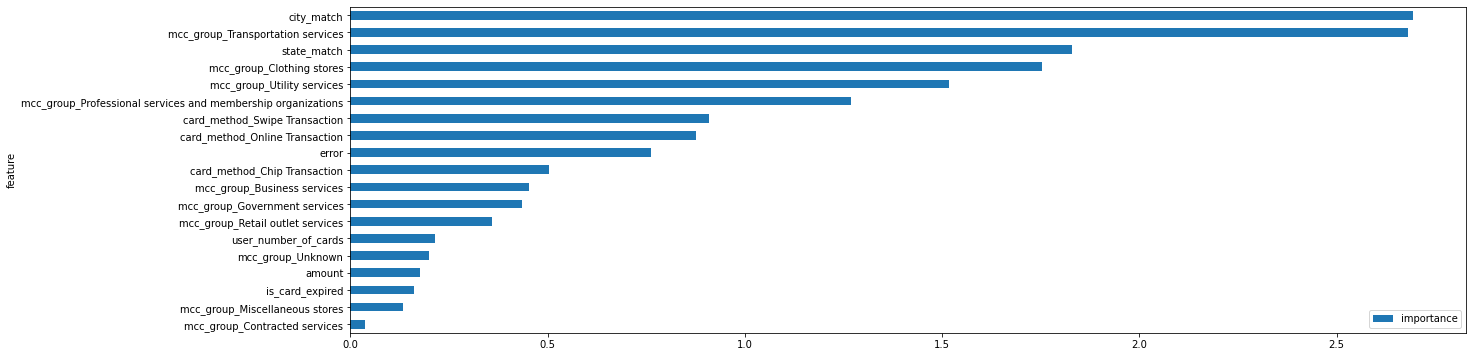

In [ ]:
# Assessing importance
N_TOP_FEATURES = 20

feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=True).tail(N_TOP_FEATURES)
feature_importance.plot(x='feature', y='importance', kind='barh', figsize=(N_TOP_FEATURES, 6))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(
    n_estimators=100, 
    max_features='auto', 
    min_samples_leaf=10
).fit(xtrain, ytrain)

ypred = rf_classifier.predict(xtest)

accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(ytest, ypred))

KeyboardInterrupt: 